## Preamble

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import urllib

import json
import numpy as np
import pandas as pd

import mplcursors

# import sdg_mapping.utils.

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans#
import umap

import matplotlib.pyplot as plt
import seaborn as sns

from sdg_mapping import project_dir
from sdg_mapping.utils.misc_utils import fetch
from sdg_mapping.sdg_index import make_sdg_index_data
from sdg_mapping.sdg_index import sdg_index_utils

SyntaxError: invalid syntax (<ipython-input-2-5d768efcb522>, line 15)

## DQ

In [225]:
make_sdg_index_data.make_sdg_index_raw()

2020-07-03 11:48:29,815 - sdg_mapping.sdg_index.make_sdg_index_data - INFO - Downloading 2019 


In [226]:
clean_df = sdg_index_utils.load_sdg_index(2019, 'report')

In [ ]:
clean_

##

In [721]:
goal_cols = [i for i in sdg_index_df.columns if (('score' in i) and ('goal' in i)) and ('regional' not in i)]
goal_region_cols = [i for i in sdg_index_df.columns if (('score' in i) and ('goal' in i)) and ('regional' in i)]
trend_cols = [i for i in sdg_index_df.columns if 'trend' in i]
dashboard_cols = [i for i in sdg_index_df.columns if (('dashboard' in i) and ('goal' in i))]

In [722]:
score_order = ['goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 
               'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
               'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
               'goal_16_score', 'goal_17_score']

regscore_order = ['goal_1_regional_score', 'goal_2_regional_score', 'goal_3_regional_score', 
                  'goal_4_regional_score', 'goal_5_regional_score', 'goal_6_regional_score', 
                  'goal_7_regional_score', 'goal_8_regional_score', 'goal_9_regional_score', 
                  'goal_10_regional_score', 'goal_11_regional_score', 'goal_12_regional_score', 
                  'goal_13_regional_score', 'goal_14_regional_score', 'goal_15_regional_score',
                  'goal_16_regional_score', 'goal_17_regional_score']

trend_order = ['goal_1_trend', 'goal_2_trend', 'goal_3_trend', 'goal_4_trend', 'goal_5_trend', 
               'goal_6_trend', 'goal_7_trend', 'goal_8_trend', 'goal_9_trend', 'goal_10_trend',
               'goal_11_trend', 'goal_12_trend', 'goal_13_trend', 'goal_14_trend', 'goal_15_trend',
               'goal_16_trend', 'goal_17_trend']

dash_order = ['goal_1_dashboard', 'goal_2_dashboard', 'goal_3_dashboard', 'goal_4_dashboard', 'goal_5_dashboard', 
               'goal_6_dashboard', 'goal_7_dashboard', 'goal_8_dashboard', 'goal_9_dashboard', 'goal_10_dashboard',
               'goal_11_dashboard', 'goal_12_dashboard', 'goal_13_dashboard', 'goal_14_dashboard', 'goal_15_dashboard',
               'goal_16_dashboard', 'goal_17_dashboard']

##

In [725]:
clean_df['goal_12_trend'] = np.nan

In [761]:
sdg_index_df = clean_df[score_order + regscore_order + trend_order + dash_order]

In [762]:
# clean_df.columns.get_loc("poverty_headcount_ratio_at_$1.90/day_(%_population)")
# clean_df.columns.get_loc("dashboard_color_sdg17_secrecy")
# sub_category_values_info = clean_df.columns[47:451+1]
# sdg_index_df = clean_df[clean_df.columns.difference(sub_category_values_info)]
# sdg_index_df.set_index(['id'], inplace=True)

##

In [729]:
goal_cols = [i for i in sdg_index_df.columns if (('score' in i) and ('goal' in i)) and ('regional' not in i)]
goal_region_cols = [i for i in sdg_index_df.columns if (('score' in i) and ('goal' in i)) and ('regional' in i)]
trend_cols = [i for i in sdg_index_df.columns if 'trend' in i]
dashboard_cols = [i for i in sdg_index_df.columns if (('dashboard' in i) and ('goal' in i))]

In [730]:
# fields
score_order = ['goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 
               'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
               'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
               'goal_16_score', 'goal_17_score']

regscore_order = ['goal_1_regional_score', 'goal_2_regional_score', 'goal_3_regional_score', 
                  'goal_4_regional_score', 'goal_5_regional_score', 'goal_6_regional_score', 
                  'goal_7_regional_score', 'goal_8_regional_score', 'goal_9_regional_score', 
                  'goal_10_regional_score', 'goal_11_regional_score', 'goal_12_regional_score', 
                  'goal_13_regional_score', 'goal_14_regional_score', 'goal_15_regional_score',
                  'goal_16_regional_score', 'goal_17_regional_score']

trend_order = ['goal_1_trend', 'goal_2_trend', 'goal_3_trend', 'goal_4_trend', 'goal_5_trend', 
               'goal_6_trend', 'goal_7_trend', 'goal_8_trend', 'goal_9_trend', 'goal_10_trend',
               'goal_11_trend', 'goal_12_trend', 'goal_13_trend', 'goal_14_trend', 'goal_15_trend',
               'goal_16_trend', 'goal_17_trend']

dash_order = ['goal_1_dashboard', 'goal_2_dashboard', 'goal_3_dashboard', 'goal_4_dashboard', 'goal_5_dashboard', 
               'goal_6_dashboard', 'goal_7_dashboard', 'goal_8_dashboard', 'goal_9_dashboard', 'goal_10_dashboard',
               'goal_11_dashboard', 'goal_12_dashboard', 'goal_13_dashboard', 'goal_14_dashboard', 'goal_15_dashboard',
               'goal_16_dashboard', 'goal_17_dashboard']

## Missing values

In [862]:
missing_vals_dash

,field,frequency
11,goal_14_dashboard,46
15,goal_10_dashboard,34
17,goal_1_dashboard,32
49,goal_8_dashboard,19
51,goal_16_dashboard,17
53,goal_11_dashboard,14
54,goal_17_dashboard,13
57,goal_2_dashboard,12
58,goal_4_dashboard,10
59,goal_15_dashboard,10


In [861]:
missing_vals_fields = missing_values(sdg_index_df)
# missing_vals_fields[missing_vals_fields['field']]
missing_vals_score = missing_vals_fields[missing_vals_fields.field.isin(goal_cols)]#[score_order]
missing_vals_regscore = missing_vals_fields[missing_vals_fields.field.isin(goal_region_cols)]#[regscore_order]
missing_vals_trend = missing_vals_fields[missing_vals_fields.field.isin(trend_cols)]#[trend_order]
missing_vals_dash = missing_vals_fields[missing_vals_fields.field.isin(dashboard_cols)]#[dash_order]

missing_vals_score.field = missing_vals_score.field.astype("category")
missing_vals_regscore.field = missing_vals_regscore.field.astype("category")
missing_vals_trend.field = missing_vals_trend.field.astype("category")
missing_vals_dash.field = missing_vals_dash.field.astype("category")

missing_vals_score.field.cat.set_categories(score_order, inplace=True)
missing_vals_regscore.field.cat.set_categories(regscore_order, inplace=True)
missing_vals_trend.field.cat.set_categories(trend_order, inplace=True)
missing_vals_dash.field.cat.set_categories(dash_order, inplace=True)

/home/ao95/miniconda3/envs/sdg_mapping/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [969]:
dict_goals = {
    'goal_1_score': 'SDG1', 
    'goal_2_score': 'SDG2', 
    'goal_3_score': 'SDG3', 
    'goal_4_score': 'SDG4', 
    'goal_5_score': 'SDG5', 
    'goal_6_score': 'SDG6', 
    'goal_7_score': 'SDG7', 
    'goal_8_score': 'SDG8', 
    'goal_9_score': 'SDG9', 
    'goal_10_score': 'SDG10', 
    'goal_11_score': 'SDG11', 
    'goal_12_score': 'SDG12', 
    'goal_13_score': 'SDG13', 
    'goal_14_score': 'SDG14', 
    'goal_15_score': 'SDG15', 
    'goal_16_score': 'SDG16',
    'goal_17_score': 'SDG17'
    
}

In [864]:
from sdg_mapping.utils.sdg_utils import sdg_hex_color_codes, sdg_names

In [865]:
color_map = list(sdg_hex_color_codes().values())

###

In [866]:
sdg_map_score = {
    'goal_1_score': 1, 
    'goal_2_score': 2, 
    'goal_3_score': 3, 
    'goal_4_score': 4, 
    'goal_5_score': 5, 
    'goal_6_score': 6, 
    'goal_7_score': 7, 
    'goal_8_score': 8, 
    'goal_9_score': 9, 
    'goal_10_score': 10, 
    'goal_11_score': 11, 
    'goal_12_score': 12, 
    'goal_13_score': 13, 
    'goal_14_score': 14, 
    'goal_15_score': 15, 
    'goal_16_score': 16, 
    'goal_17_score': 17 
}

In [867]:
sdg_map_regscore = {
    'goal_1_regional_score': 1, 
    'goal_2_regional_score': 2, 
    'goal_3_regional_score': 3, 
    'goal_4_regional_score': 4, 
    'goal_5_regional_score': 5, 
    'goal_6_regional_score': 6, 
    'goal_7_regional_score': 7, 
    'goal_8_regional_score': 8, 
    'goal_9_regional_score': 9, 
    'goal_10_regional_score': 10, 
    'goal_11_regional_score': 11, 
    'goal_12_regional_score': 12, 
    'goal_13_regional_score': 13, 
    'goal_14_regional_score': 14, 
    'goal_15_regional_score': 15, 
    'goal_16_regional_score': 16, 
    'goal_17_regional_score': 17 
}

In [868]:
sdg_map_trend = {
    'goal_1_trend': 1, 
    'goal_2_trend': 2, 
    'goal_3_trend': 3, 
    'goal_4_trend': 4, 
    'goal_5_trend': 5, 
    'goal_6_trend': 6, 
    'goal_7_trend': 7, 
    'goal_8_trend': 8, 
    'goal_9_trend': 9, 
    'goal_10_trend': 10, 
    'goal_11_trend': 11, 
    'goal_12_trend': 12, 
    'goal_13_trend': 13, 
    'goal_14_trend': 14, 
    'goal_15_trend': 15, 
    'goal_16_trend': 16, 
    'goal_17_trend': 17 
}

In [869]:
sdg_map_dash = {
    'goal_1_dashboard': 1, 
    'goal_2_dashboard': 2, 
    'goal_3_dashboard': 3, 
    'goal_4_dashboard': 4, 
    'goal_5_dashboard': 5, 
    'goal_6_dashboard': 6, 
    'goal_7_dashboard': 7, 
    'goal_8_dashboard': 8, 
    'goal_9_dashboard': 9, 
    'goal_10_dashboard': 10, 
    'goal_11_dashboard': 11, 
    'goal_12_dashboard': 12, 
    'goal_13_dashboard': 13, 
    'goal_14_dashboard': 14, 
    'goal_15_dashboard': 15, 
    'goal_16_dashboard': 16, 
    'goal_17_dashboard': 17 
}

### Missing values

In [870]:
missing_vals_score['field'] = missing_vals_score['field'].map(sdg_map_score)
missing_vals_regscore['field'] = missing_vals_regscore['field'].map(sdg_map_regscore)
missing_vals_trend['field'] = missing_vals_trend['field'].map(sdg_map_trend)
missing_vals_dash['field'] = missing_vals_dash['field'].map(sdg_map_dash)

/home/ao95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ao95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ao95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [871]:
missing_vals_score

,field,frequency
5,14,67
12,10,45
13,1,42
18,12,31
19,16,31
27,17,31
28,2,31
29,3,31
30,15,31
31,13,31


In [872]:
sdg_hex_color_codes()

{1: '#E5243B',
 2: '#DDA63A',
 3: '#4C9F38',
 4: '#C5192D',
 5: '#FF3A21',
 6: '#26BDE2',
 7: '#FCC30B',
 8: '#A21942',
 9: '#FD6925',
 10: '#DD1367',
 11: '#FD9D24',
 12: '#BF8B2E',
 13: '#3F7E44',
 14: '#0A97D9',
 15: '#56C02B',
 16: '#00689D',
 17: '#19486A'}

Text(0, 0.5, 'SDG (Type: Score)')

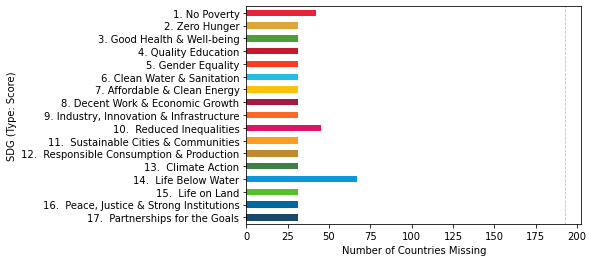

In [873]:
# plt.barh(missing_vals_fields.index, missing_vals_fields.values)
# sns.barplot(x='frequency', y='field', color=color_map, data=missing_vals_score)
fig, ax = plt.subplots()
p = missing_vals_score.set_index('field').sort_index()
p.frequency.plot.barh(ax=ax,  color=sdg_hex_color_codes().values())
ax.set_yticklabels(sdg_names().values())
ax.invert_yaxis()
ax.axvline(x=len(sdg_index_df), color='grey', linestyle= '--', linewidth=0.8, alpha=0.5)
plt.xlabel('Number of Countries Missing')
plt.ylabel('SDG (Type: Score)')

Text(0, 0.5, 'SDG (Type: Score)')

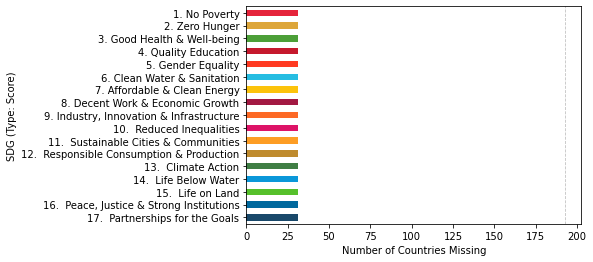

In [874]:
# sns.barplot(x='frequency', y='field', data=missing_vals_regscore)
fig, ax = plt.subplots()
p = missing_vals_regscore.set_index('field').sort_index()
p.frequency.plot.barh(ax=ax,  color=sdg_hex_color_codes().values())
ax.set_yticklabels(sdg_names().values())
ax.invert_yaxis()
ax.axvline(x=len(sdg_index_df), color='grey', linestyle= '--', linewidth=0.8, alpha=0.5)
plt.xlabel('Number of Countries Missing')
plt.ylabel('SDG (Type: Score)')
#certain countries 

Text(0, 0.5, 'SDG (Type: Score)')

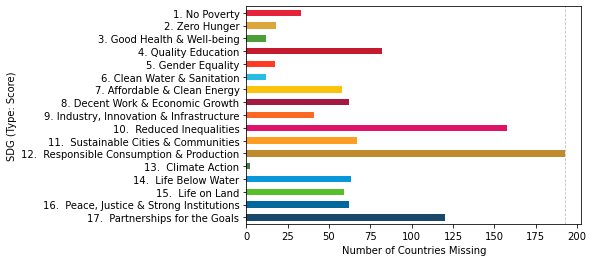

In [875]:
# sns.barplot(x='frequency', y='field', data=missing_vals_trend)
fig, ax = plt.subplots()
p = missing_vals_trend.set_index('field').sort_index()
p.frequency.plot.barh(ax=ax,  color=sdg_hex_color_codes().values())
ax.set_yticklabels(sdg_names().values())
ax.invert_yaxis()
ax.axvline(x=len(sdg_index_df), color='grey', linestyle= '--', linewidth=0.8, alpha=0.5)
plt.xlabel('Number of Countries Missing')
plt.ylabel('SDG (Type: Score)')

Text(0, 0.5, 'SDG (Type: Score)')

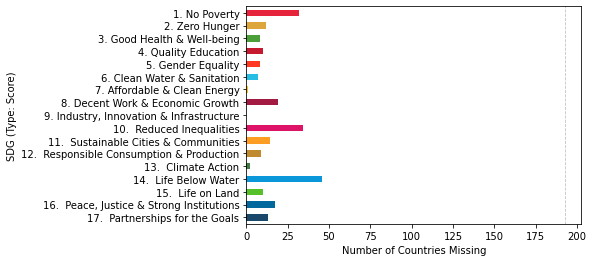

In [876]:
# sns.barplot(x='frequency', y='field', data=missing_vals_dash)
fig, ax = plt.subplots()
p = missing_vals_dash.set_index('field').sort_index()
p.frequency.plot.barh(ax=ax,  color=sdg_hex_color_codes().values())
ax.set_yticklabels(sdg_names().values())
ax.invert_yaxis()
ax.axvline(x=len(sdg_index_df), color='grey', linestyle= '--', linewidth=0.8, alpha=0.5)
plt.xlabel('Number of Countries Missing')
plt.ylabel('SDG (Type: Score)')

## EDA

In [598]:
x = missing_values(sdg_index_df[goal_cols], False)



# pd.cut(x.frequency, [0,2,5,8,11,14,17], include_lowest=True).value_counts(sort=False).plot(kind = 'bar')

### SDG Goal missing values for each country

In [599]:

x = sdg_index_df[score_order]

# x.index

In [600]:
# for item, frame in x['goal_1_score'].iteritems():
#     if pd.notnull(frame):
#         print(frame)
appended_data = []
for i in x.index:
    d = x.loc[[i]].columns[x.loc[[i]].isna().any()].tolist()
    appended_data.append(d)
# x.apply(missing_sdgs, axis=0)

bin_df = pd.Series(appended_data, index=x.index, name='s1')

one_hot =MultiLabelBinarizer()
binary_list = []
for j in bin_df:
    binary_list.append(j)
a = one_hot.fit_transform(binary_list)
df_labels = pd.DataFrame(a, columns=one_hot.classes_)
# # df_labels
# df_2__ = pd.concat([df_2_copy__2, df_labels], axis=1)

In [601]:
miss = df_labels.set_index(x.index)

In [602]:
# % of 
(miss.sum()/len(miss))*100

goal_10_score    23.316062
goal_11_score    16.062176
goal_12_score    16.062176
goal_13_score    16.062176
goal_14_score    34.715026
goal_15_score    16.062176
goal_16_score    16.062176
goal_17_score    16.062176
goal_1_score     21.761658
goal_2_score     16.062176
goal_3_score     16.062176
goal_4_score     16.062176
goal_5_score     16.062176
goal_6_score     16.062176
goal_7_score     16.062176
goal_8_score     16.062176
goal_9_score     16.062176
dtype: float64

In [603]:
x_scores

,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
id,,,,,,,,,,,,,,,,,
AGO,45.157118,47.775067,33.741059,37.841050,53.566085,45.961705,48.748886,59.876359,5.652222,57.183099,45.956779,93.660870,90.891232,47.837935,64.968301,41.720635,51.907683
ALB,96.852885,46.063410,82.205603,93.398454,53.302847,77.246543,88.636588,62.238765,27.966398,59.780127,78.567869,83.180261,92.076256,40.994170,79.959441,67.335663,64.829722
ARG,97.034957,60.833556,80.186147,94.267068,77.405419,80.228891,91.417806,72.206208,40.543532,39.661771,83.506168,79.120048,92.145653,39.937464,52.982601,62.955892,85.523745
AUS,99.030223,52.414466,96.453265,92.809156,78.898731,96.984575,91.004759,81.086487,84.202484,76.961401,80.593213,40.850623,33.898481,56.286394,47.761451,85.692653,61.144333
AZE,100.000000,58.216075,75.289696,90.759336,53.914706,62.803993,91.013353,68.104111,37.298847,68.306269,83.082741,89.114386,90.639571,22.453040,66.882380,70.158141,69.764724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,98.919361,66.044972,89.538751,89.336039,73.356813,84.982341,93.207178,85.183978,83.348530,47.662360,82.468821,36.545486,66.124093,60.854831,76.944030,76.137902,56.177889
VEN,35.010150,47.515422,66.185609,76.264600,69.025505,79.868312,91.887477,78.603005,24.659209,25.946902,62.704166,78.545819,89.016768,51.390199,78.881298,36.768314,79.651879
VNM,95.335018,62.587816,74.775860,91.705183,71.962874,70.767337,82.385900,74.159615,26.367330,78.278529,77.636368,87.084328,94.516968,45.223764,48.593026,61.759974,65.309891


### SDG distribution

In [675]:
list(sdg_hex_color_codes().values())[0]

'#E5243B'

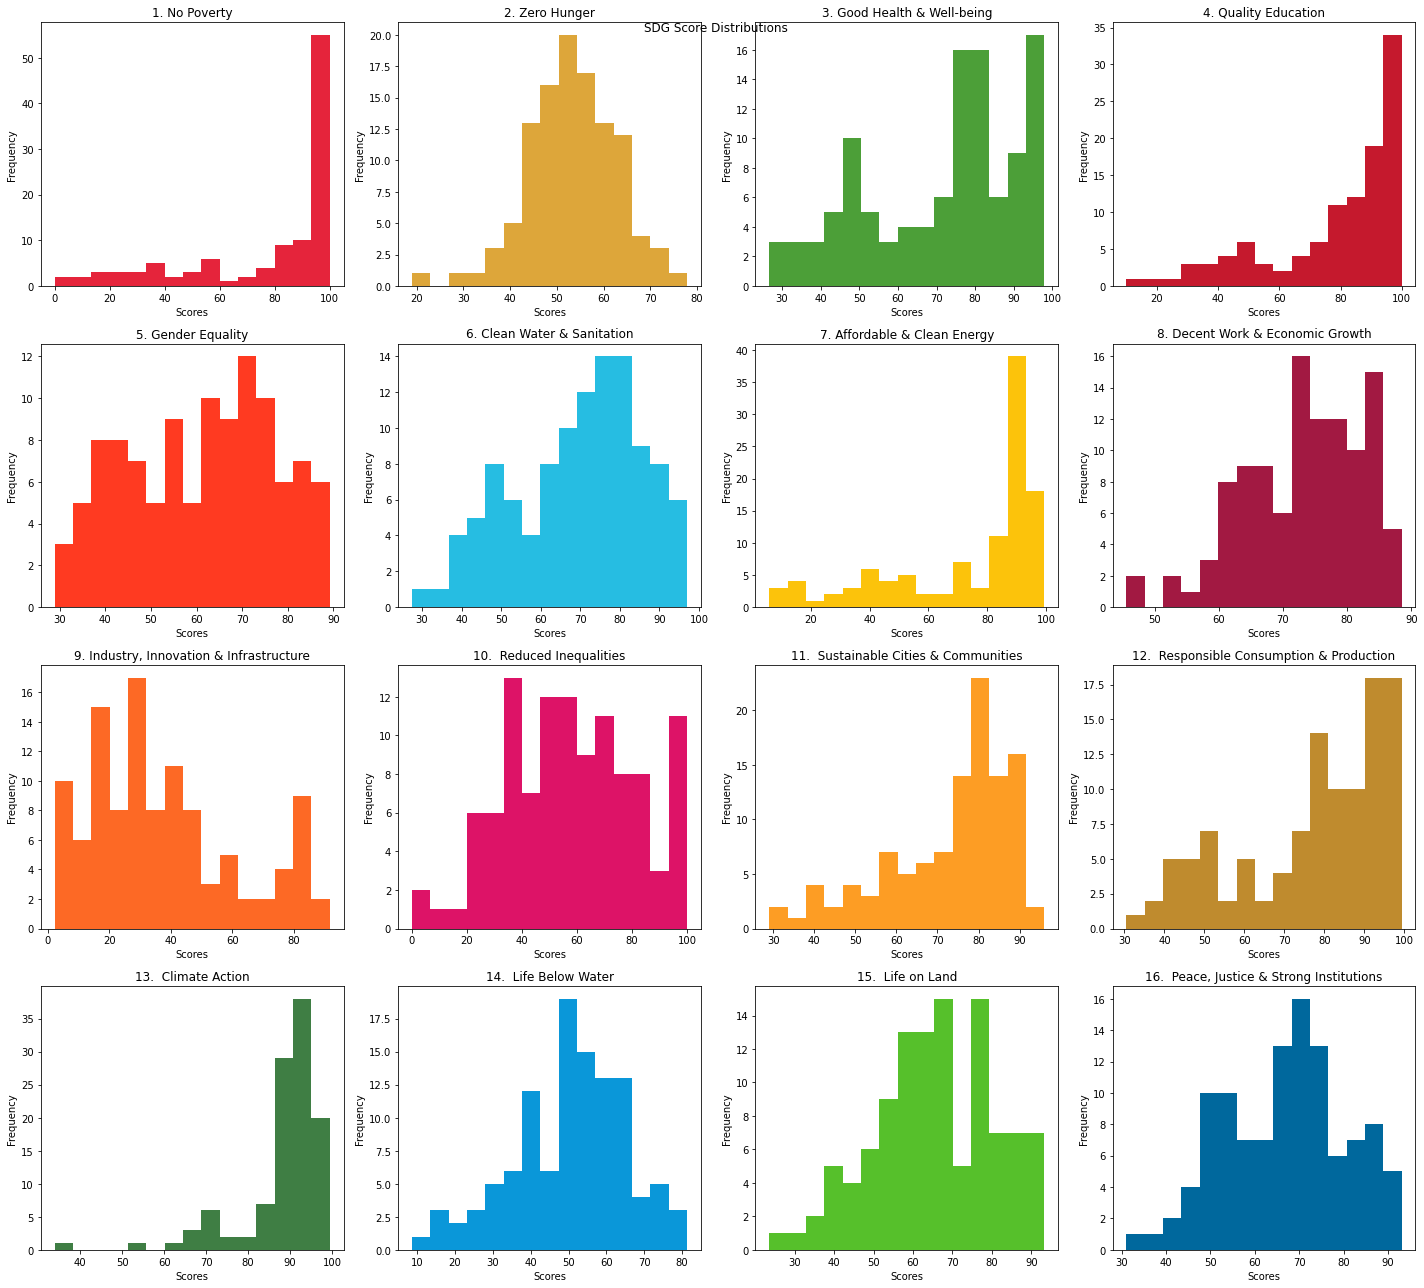

In [839]:
#includes all countries- no. of countries may change from SDG to SDG 
fig = plt.figure(figsize=(20,18))
plt.suptitle('SDG Score Distributions')
for i in range(len(x.columns[:-1])):
    
    plt.subplot(4,4,i+1)
    plt.title(list(sdg_names().values())[i])
    plt.hist(x_scores[x.columns[i]], bins=15,
            color = list(sdg_hex_color_codes().values())[i])
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
plt.tight_layout()
#     plt.scatter(x,y, c = labels, alpha=0.5)

In [667]:
x_scores.columns[:-1]

Index(['goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score',
       'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score',
       'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score',
       'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score'],
      dtype='object')

### Proportion of SDG TREND/dashboard statues

In [822]:
sdg_index_df[trend_order].

""


In [812]:
sdg_index_df[sdg_index_df[trend_order].columns[i]]

0                      NaN
1               decreasing
2      increasing_on_track
3                      NaN
4                      NaN
              ...         
188    increasing_on_track
189                    NaN
190               stagnant
191               stagnant
192                    NaN
Name: goal_1_trend, Length: 193, dtype: object

In [887]:
trend_df =sdg_index_df[trend_order].replace(np.nan, '', regex=True)
trend_df

,goal_1_trend,goal_2_trend,goal_3_trend,goal_4_trend,goal_5_trend,goal_6_trend,goal_7_trend,goal_8_trend,goal_9_trend,goal_10_trend,goal_11_trend,goal_12_trend,goal_13_trend,goal_14_trend,goal_15_trend,goal_16_trend,goal_17_trend
0,,stagnant,stagnant,,stagnant,increasing_moderately,,stagnant,stagnant,,stagnant,,increasing_on_track,,decreasing,stagnant,decreasing
1,decreasing,increasing_moderately,stagnant,,stagnant,stagnant,increasing_moderately,,stagnant,,,,increasing_on_track,stagnant,stagnant,,
2,increasing_on_track,stagnant,increasing_moderately,increasing_on_track,increasing_moderately,increasing_on_track,increasing_on_track,stagnant,increasing_moderately,,increasing_moderately,,increasing_on_track,increasing_moderately,increasing_moderately,increasing_moderately,
3,,,,,,increasing_on_track,,,,,,,stagnant,,,,
4,,stagnant,increasing_moderately,,stagnant,increasing_on_track,increasing_moderately,increasing_on_track,increasing_on_track,,,,decreasing,stagnant,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,increasing_on_track,stagnant,increasing_moderately,increasing_moderately,stagnant,increasing_moderately,,,,,,,increasing_on_track,stagnant,,,
189,,decreasing,stagnant,stagnant,stagnant,increasing_moderately,increasing_moderately,,,,increasing_moderately,,increasing_on_track,increasing_moderately,decreasing,,
190,stagnant,increasing_moderately,increasing_moderately,,increasing_moderately,increasing_moderately,increasing_moderately,stagnant,increasing_moderately,,stagnant,,stagnant,stagnant,increasing_moderately,stagnant,increasing_on_track
191,stagnant,stagnant,increasing_moderately,,increasing_moderately,stagnant,stagnant,increasing_moderately,increasing_moderately,,stagnant,,increasing_on_track,,stagnant,stagnant,


In [889]:
a = trend_df.eq('increasing_on_track').sum()
a = pd.DataFrame([a.values],columns=a.index, index=['increasing_on_track'])
b = trend_df.eq('increasing_moderately').sum()
b = pd.DataFrame([b.values],columns=b.index, index=['increasing_moderately'])
c = trend_df.eq('stagnant').sum()
c = pd.DataFrame([c.values],columns=c.index, index=['stagnant'])
d = trend_df.eq('decreasing').sum()
d = pd.DataFrame([d.values],columns=d.index, index=['decreasing'])
e = trend_df.eq('').sum()
e = pd.DataFrame([e.values],columns=e.index, index=['Information not available'])
trend_df_counts = pd.concat([a,b,c,d,e])
trend_df_counts

,goal_1_trend,goal_2_trend,goal_3_trend,goal_4_trend,goal_5_trend,goal_6_trend,goal_7_trend,goal_8_trend,goal_9_trend,goal_10_trend,goal_11_trend,goal_12_trend,goal_13_trend,goal_14_trend,goal_15_trend,goal_16_trend,goal_17_trend
increasing_on_track,73,0,21,32,7,51,40,62,21,8,16,0,98,2,28,12,10
increasing_moderately,43,108,125,32,94,56,71,50,81,8,56,0,19,59,30,56,20
stagnant,26,62,35,37,73,67,23,19,50,15,50,0,48,65,52,59,34
decreasing,18,5,0,10,2,7,1,0,0,4,4,0,26,4,24,4,9
Information not available,33,18,12,82,17,12,58,62,41,158,67,193,2,63,59,62,120


In [ ]:
# "increasing_on_track",
#  "increasing_moderately",
# "stagnant",
# "decreasing"

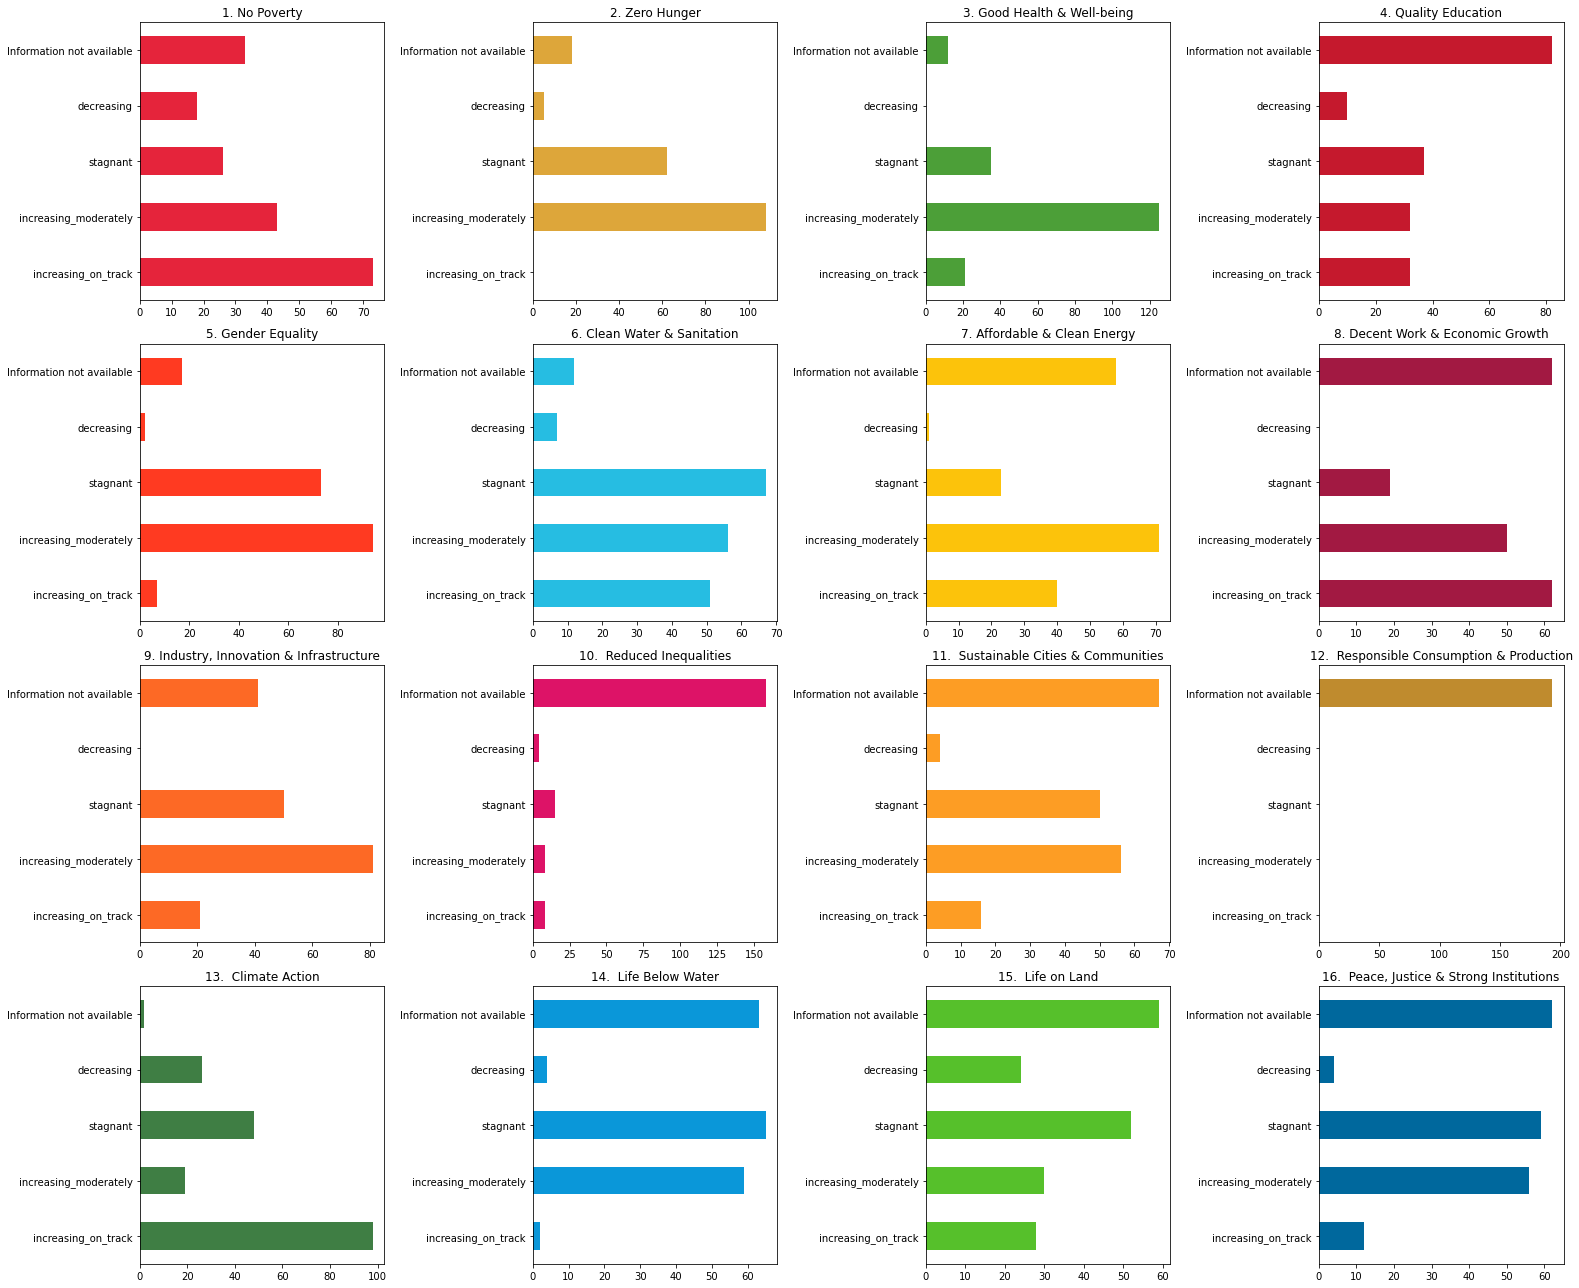

In [903]:
fig = plt.figure(figsize=(22,18))
plt.title('SDG Trends')
# alphas = np.linspace(0.3, 1, 4)
for i in range(len(trend_df_counts.columns[:-1])):
    plt.subplot(4,4,i+1)
    plt.title(list(sdg_names().values())[i])
    z = trend_df_counts[trend_df_counts.columns[i]].plot(kind = 'barh',
                                                         color=list(sdg_hex_color_codes().values())[i])

plt.tight_layout()
# sdg_index_df[trend_cols]['goal_10_trend'].value_counts().plot(kind = 'barh')

In [901]:
list(sdg_hex_color_codes().values())[i]

'#E5243B'

In [904]:
dash_df =sdg_index_df[dash_order].replace(np.nan, '', regex=True)
dash_df

,goal_1_dashboard,goal_2_dashboard,goal_3_dashboard,goal_4_dashboard,goal_5_dashboard,goal_6_dashboard,goal_7_dashboard,goal_8_dashboard,goal_9_dashboard,goal_10_dashboard,goal_11_dashboard,goal_12_dashboard,goal_13_dashboard,goal_14_dashboard,goal_15_dashboard,goal_16_dashboard,goal_17_dashboard
0,,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,significant_challenges,major_challenges,major_challenges,,major_challenges,goal_achievement,challenges_remain,,major_challenges,major_challenges,major_challenges
1,major_challenges,major_challenges,major_challenges,major_challenges,significant_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,challenges_remain,major_challenges,major_challenges,challenges_remain,major_challenges,significant_challenges
2,challenges_remain,major_challenges,significant_challenges,challenges_remain,significant_challenges,significant_challenges,challenges_remain,major_challenges,significant_challenges,major_challenges,significant_challenges,challenges_remain,significant_challenges,major_challenges,challenges_remain,significant_challenges,significant_challenges
3,,challenges_remain,,,challenges_remain,goal_achievement,goal_achievement,,significant_challenges,,challenges_remain,,major_challenges,,significant_challenges,challenges_remain,challenges_remain
4,,major_challenges,challenges_remain,challenges_remain,significant_challenges,major_challenges,challenges_remain,significant_challenges,significant_challenges,challenges_remain,significant_challenges,major_challenges,major_challenges,challenges_remain,significant_challenges,significant_challenges,goal_achievement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,challenges_remain,significant_challenges,major_challenges,challenges_remain,major_challenges,challenges_remain,challenges_remain,significant_challenges,major_challenges,major_challenges,significant_challenges,goal_achievement,goal_achievement,significant_challenges,significant_challenges,,challenges_remain
189,,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,significant_challenges,major_challenges,challenges_remain,challenges_remain,significant_challenges,significant_challenges,major_challenges,challenges_remain
190,major_challenges,major_challenges,major_challenges,significant_challenges,challenges_remain,significant_challenges,significant_challenges,major_challenges,significant_challenges,major_challenges,significant_challenges,significant_challenges,major_challenges,significant_challenges,significant_challenges,major_challenges,goal_achievement
191,major_challenges,major_challenges,major_challenges,significant_challenges,significant_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,major_challenges,significant_challenges,challenges_remain,,challenges_remain,major_challenges,significant_challenges


In [917]:
a = dash_df.eq('goal_achievement').sum()
a = pd.DataFrame([a.values],columns=a.index, index=['goal_achievement'])
b = dash_df.eq('challenges_remain').sum()
b = pd.DataFrame([b.values],columns=b.index, index=['challenges_remain'])
c = dash_df.eq('significant_challenges').sum()
c = pd.DataFrame([c.values],columns=c.index, index=['significant_challenges'])
d = dash_df.eq('major_challenges').sum()
d = pd.DataFrame([d.values],columns=d.index, index=['major_challenges'])
e = dash_df.eq('').sum()
e = pd.DataFrame([e.values],columns=e.index, index=['Information not available'])
dash_df_counts = pd.concat([a,b,c,d,e])
dash_df_counts[]

SyntaxError: invalid syntax (<ipython-input-917-bd3402e0ae1e>, line 12)

In [922]:
des_index = dash_df_counts.T.sort_values('goal_achievement', ascending=False).drop('goal_17_dashboard').index

des_index_goal = [int(i.split('_')[1]) for i in des_index]

In [ ]:
"goal_achievement",
"challenges_remain",
"significant_challenges",
"major_challenges"

In [929]:
tips = sns.load_dataset("tips")

In [930]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


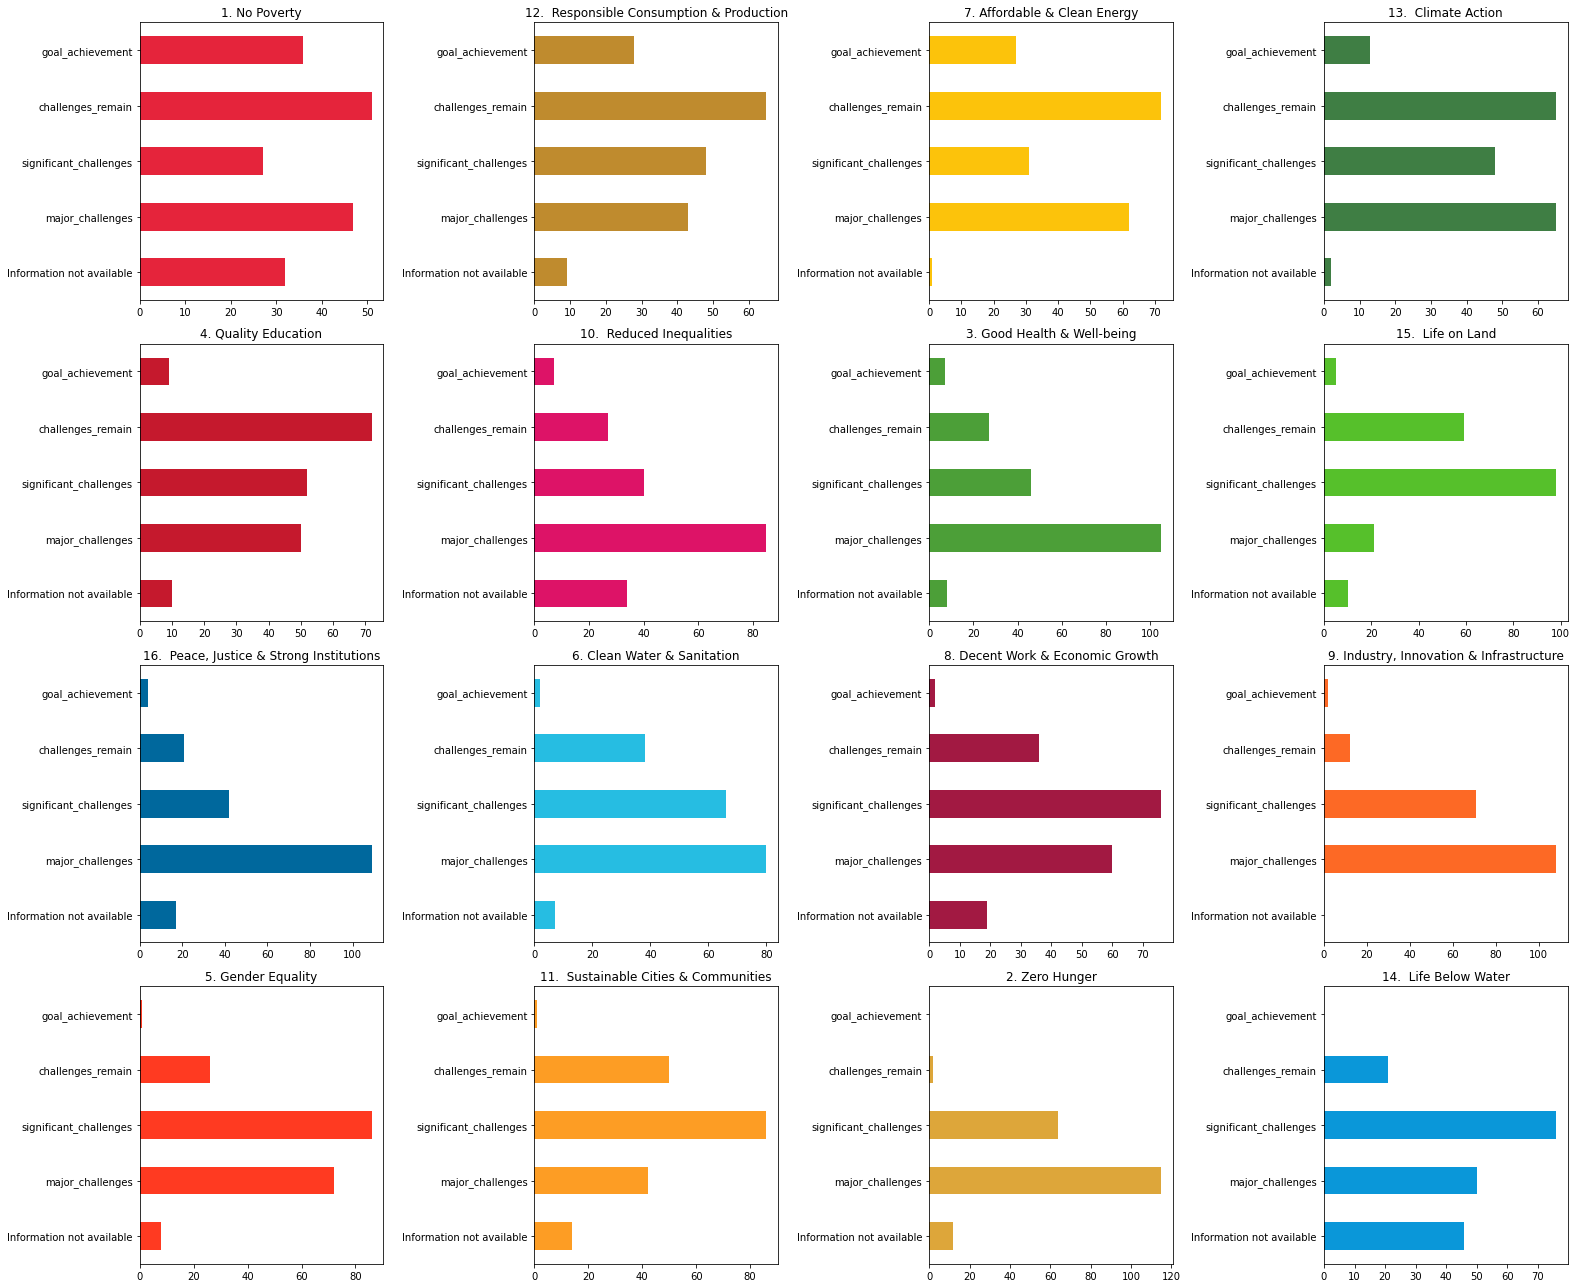

In [928]:
fig = plt.figure(figsize=(22,18))
plt.title('SDG Dashboard')
# alphas = np.linspace(0.3, 1, 4)
for i,ng in enumerate(zip(des_index, des_index_goal)):
    name,goal = ng
    plt.subplot(4,4,i+1)
    plt.title(sdg_names()[goal])
    z = dash_df_counts[name].plot(kind = 'barh',
                                                         color=sdg_hex_color_codes()[goal])
    z.invert_yaxis()

plt.tight_layout()

### Similarity Matrix

In [604]:
x_scores = x.dropna()

In [605]:
siml_vecs = cosine_similarity(x_scores)

In [606]:
siml_vecs.shape

(110, 110)

In [607]:
sim_df = pd.DataFrame(siml_vecs, index= x_scores.index.values, columns = x_scores.index.values)
# sim_df.dropna(inplace=True)

In [608]:
sim_df

,AGO,ALB,ARG,AUS,AZE,BEL,BEN,BGD,BGR,BIH,...,TUN,TUR,TZA,UKR,URY,USA,VEN,VNM,VUT,ZAF
AGO,1.000000,0.941394,0.927392,0.835581,0.938329,0.894037,0.966530,0.976619,0.944766,0.914221,...,0.949429,0.911793,0.980436,0.945287,0.925507,0.869582,0.945510,0.951434,0.945798,0.918349
ALB,0.941394,1.000000,0.985760,0.938510,0.993242,0.968210,0.897939,0.967723,0.986807,0.977590,...,0.991792,0.988294,0.912211,0.988047,0.987169,0.958135,0.957945,0.987326,0.960527,0.946845
ARG,0.927392,0.985760,1.000000,0.947568,0.985956,0.964464,0.880779,0.948064,0.980577,0.969619,...,0.984994,0.991546,0.909011,0.977307,0.997966,0.965225,0.965052,0.986787,0.951410,0.973065
AUS,0.835581,0.938510,0.947568,1.000000,0.937566,0.975309,0.780993,0.890633,0.951807,0.925745,...,0.936276,0.949450,0.832144,0.938694,0.958027,0.983157,0.892493,0.941672,0.920842,0.902609
AZE,0.938329,0.993242,0.985956,0.937566,1.000000,0.972240,0.887354,0.962654,0.978359,0.987131,...,0.988415,0.989045,0.908041,0.989549,0.988117,0.952727,0.944406,0.990383,0.956594,0.939026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,0.869582,0.958135,0.965225,0.983157,0.952727,0.983067,0.832407,0.909803,0.976339,0.925768,...,0.953741,0.966865,0.860032,0.943325,0.970854,1.000000,0.928159,0.950347,0.921486,0.941623
VEN,0.945510,0.957945,0.965052,0.892493,0.944406,0.920811,0.923917,0.946543,0.963611,0.921647,...,0.955685,0.949664,0.935321,0.942305,0.959375,0.928159,1.000000,0.948990,0.928763,0.976685
VNM,0.951434,0.987326,0.986787,0.941672,0.990383,0.967681,0.895325,0.977382,0.978370,0.975588,...,0.988089,0.980843,0.932696,0.993510,0.989319,0.950347,0.948990,1.000000,0.969632,0.941839
VUT,0.945798,0.960527,0.951410,0.920842,0.956594,0.936318,0.930931,0.971312,0.957857,0.956125,...,0.961119,0.950581,0.949199,0.964657,0.955899,0.921486,0.928763,0.969632,1.000000,0.914087


<Figure size 1296x1296 with 0 Axes>

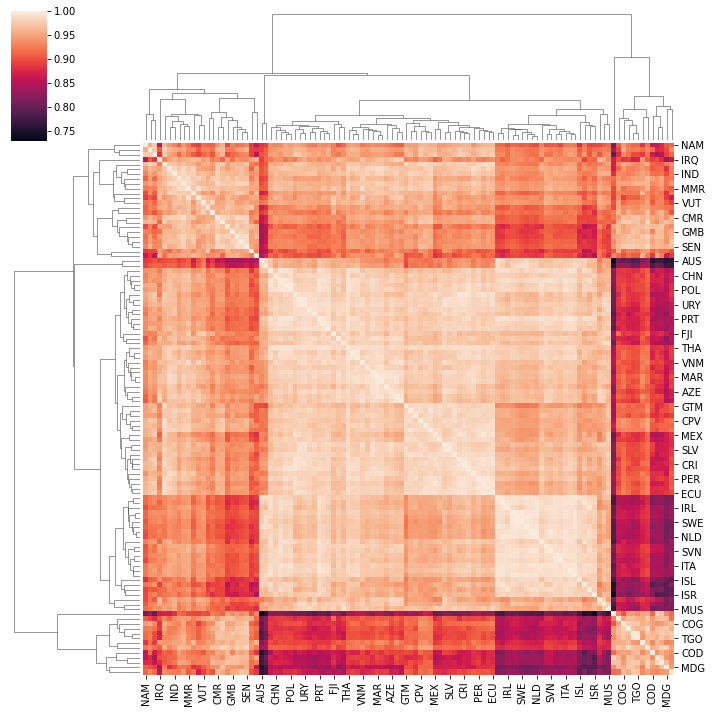

In [610]:
plt.figure(figsize=(18,18))
sns.clustermap(sim_df)

In [420]:
len(siml_vecs)

193

Mexico, SLV, peru ecuador- veryyy simialr

In [656]:
sdg_index_df['country']

id
AFG             Afghanistan
AGO                  Angola
ALB                 Albania
AND                 Andorra
ARE    United Arab Emirates
               ...         
WSM                   Samoa
YEM             Yemen, Rep.
ZAF            South Africa
ZMB                  Zambia
ZWE                Zimbabwe
Name: country, Length: 193, dtype: object

In [517]:
x_scores

,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
id,,,,,,,,,,,,,,,,,
AGO,45.157118,47.775067,33.741059,37.841050,53.566085,45.961705,48.748886,59.876359,5.652222,57.183099,45.956779,93.660870,90.891232,47.837935,64.968301,41.720635,51.907683
ALB,96.852885,46.063410,82.205603,93.398454,53.302847,77.246543,88.636588,62.238765,27.966398,59.780127,78.567869,83.180261,92.076256,40.994170,79.959441,67.335663,64.829722
ARG,97.034957,60.833556,80.186147,94.267068,77.405419,80.228891,91.417806,72.206208,40.543532,39.661771,83.506168,79.120048,92.145653,39.937464,52.982601,62.955892,85.523745
AUS,99.030223,52.414466,96.453265,92.809156,78.898731,96.984575,91.004759,81.086487,84.202484,76.961401,80.593213,40.850623,33.898481,56.286394,47.761451,85.692653,61.144333
AZE,100.000000,58.216075,75.289696,90.759336,53.914706,62.803993,91.013353,68.104111,37.298847,68.306269,83.082741,89.114386,90.639571,22.453040,66.882380,70.158141,69.764724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,98.919361,66.044972,89.538751,89.336039,73.356813,84.982341,93.207178,85.183978,83.348530,47.662360,82.468821,36.545486,66.124093,60.854831,76.944030,76.137902,56.177889
VEN,35.010150,47.515422,66.185609,76.264600,69.025505,79.868312,91.887477,78.603005,24.659209,25.946902,62.704166,78.545819,89.016768,51.390199,78.881298,36.768314,79.651879
VNM,95.335018,62.587816,74.775860,91.705183,71.962874,70.767337,82.385900,74.159615,26.367330,78.278529,77.636368,87.084328,94.516968,45.223764,48.593026,61.759974,65.309891


### K Means Clustering of Countries

In [584]:
k = KMeans(n_clusters=3)
k.fit(x_scores)

KMeans(n_clusters=3)

In [585]:
%%time
# tsne = TSNE(n_components=2)
# tsne_results = tsne.fit_transform(x_scores)

results = umap.UMAP(n_neighbors=10,
                      min_dist=0.2,
                      metric='correlation').fit_transform(x_scores)

CPU times: user 7.3 s, sys: 547 ms, total: 7.84 s
Wall time: 6.89 s


In [586]:
# results

In [587]:
# .set_index(['id'], inplace=True)
df_tsne_results = pd.DataFrame(results)

In [588]:
df_tsne_results_regions = pd.concat([df_tsne_results,sdg_index_df['un_region_name'].reset_index(drop=True)], axis=1)
# sdg_index_df['un_region_name']
# df_tsne_results
regions = sdg_index_df['un_region_name'].unique().tolist()

In [589]:
reg_dict = {v:k for k,v in dict(enumerate(regions)).items()}

df_tsne_results_regions['un_region_name'] = df_tsne_results_regions['un_region_name'].map(reg_dict)
# regions = list(dict(enumerate(regions)).keys())

In [590]:
df_tsne_results_regions

,0,1,un_region_name
0,11.573532,2.355899,0
1,9.279385,4.989213,1
2,7.950672,5.150837,2
3,2.047543,6.160983,2
4,9.117909,4.544704,0
...,...,...,...
188,NaN,NaN,4
189,NaN,NaN,0
190,NaN,NaN,1
191,NaN,NaN,1


In [591]:
df_tsne_results

,0,1
0,11.573532,2.355899
1,9.279385,4.989213
2,7.950672,5.150837
3,2.047543,6.160983
4,9.117909,4.544704
...,...,...
105,3.088437,5.864223
106,8.399354,7.272122
107,9.198835,3.589853
108,10.710387,2.046386


In [642]:
df_tsne_results_2 = df_tsne_results.set_index(x_scores.index)
df_tsne_results_2.head()

,0,1
id,,
AGO,11.573532,2.355899
ALB,9.279385,4.989213
ARG,7.950672,5.150837
AUS,2.047543,6.160983
AZE,9.117909,4.544704


In [643]:
class_df = pd.Series(index = x_scores.index, data = k.labels_)

id
AGO    1
ALB    2
ARG    2
AUS    0
AZE    2
      ..
USA    0
VEN    2
VNM    2
VUT    1
ZAF    2
Length: 110, dtype: int32

In [646]:
df_tsne_results_3 = pd.concat([df_tsne_results_2, pd.DataFrame(class_df)], axis=1)

In [649]:
df_tsne_results_3.columns = [0,1,'classes']

2020-07-07 14:29:26,510 - matplotlib.axes._axes - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-07-07 14:29:26,521 - matplotlib.axes._axes - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-07-07 14:29:26,533 - matplotlib.axes._axes - WARNING - 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB o

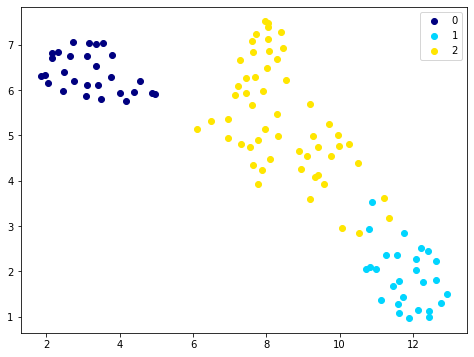

In [653]:
# fig = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,6))

x_ax = df_tsne_results_3[0]
y_ax = df_tsne_results_3[1]
# class_df.value_counts()

cmap = plt.cm.get_cmap('jet')
for i, cluster in df_tsne_results_3.groupby('classes'):
    _ = ax.scatter(cluster[0], cluster[1], c=cmap(i/3), label=i)
ax.legend()
# colors = ['red','green','blue','purple']    
#     plt.subplot(6,3,i+1)
#     plt.title(classes[i])
# my_plot = plt.scatter(x_ax,y_ax, c = k.labels_, alpha=0.5, s=80, cmap="tab10")
# plt.legend(my_plot) 
# mplcursors.cursor(hover=True)

In [970]:
# pd.concat([x_scores, df_tsne_results_3['classes']], axis=1).stack()
con = pd.concat([x_scores, df_tsne_results_3['classes']], axis=1).reset_index()
stack_df = con.melt(['classes', 'id'],value_name='sdgs')
stack_df['variable'] = stack_df['variable'].map(dict_goals)
stack_df

# stack_df[stack_df['id'] == 'ALB']

,classes,id,variable,sdgs
0,1,AGO,SDG1,45.157118
1,2,ALB,SDG1,96.852885
2,2,ARG,SDG1,97.034957
3,0,AUS,SDG1,99.030223
4,2,AZE,SDG1,100.000000
...,...,...,...,...
1865,0,USA,SDG17,56.177889
1866,2,VEN,SDG17,79.651879
1867,2,VNM,SDG17,65.309891
1868,1,VUT,SDG17,66.629725


In [1000]:
# stack_df[stack_df['sdgs'] == np.nan]#.value_counts()

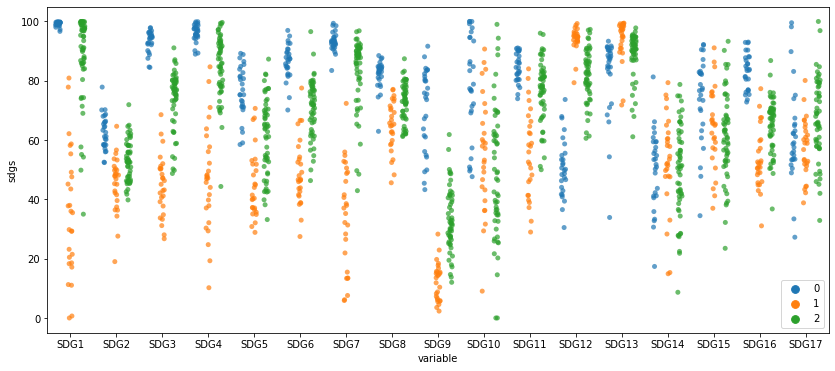

In [1010]:
plt.figure(figsize=(14,6))
ax = sns.stripplot(x='variable', y= 'sdgs',
                  hue= 'classes', data= stack_df,
                  dodge=True, jitter = 0.15, alpha=0.7)
plt.legend()
# plt.xticks(rotation=270)

In [988]:
#mainly OECD
#majority stay over 50 score mark
clus_1 = class_df[class_df == 0].index

In [989]:
#mianly african (couple south asian)
clus_2 = class_df[class_df == 1].index

In [990]:
#mainly asia and eastern europe
clus_3 = class_df[class_df == 2].index

In [994]:
clean_df.set_index('id').loc[clus_2]

,country,2019_global_index_score_(0-100),2019_global_index_rank,percentage_missing_values,regional_score_(0-100),spillover_score_(0-100),un_region_name,regions_used_for_the_sdg_index_&_dashboard,income_group_in_2019,"country_is_an_oecd_member,_yes=1_no=0",...,goal_9_regional_score,goal_10_regional_score,goal_11_regional_score,goal_12_regional_score,goal_13_regional_score,goal_14_regional_score,goal_15_regional_score,goal_16_regional_score,goal_17_regional_score,goal_12_trend
id,,,,,,,,,,,,,,,,,,,,,
AGO,Angola,51.320358,149.0,2.380952,53.782484,98.598159,Africa,Africa,LMIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
BEN,Benin,50.853801,151.0,4.761905,53.782484,96.571672,Africa,Africa,LIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
BGD,Bangladesh,60.875489,116.0,3.571429,65.737734,98.002837,Asia,East & South Asia,LMIC,0,...,32.482081,62.272284,71.027845,85.428913,89.612647,46.366021,54.256531,64.503867,53.183601,NaN
CIV,Cote d'Ivoire,55.701777,129.0,7.142857,53.782484,96.988475,Africa,Africa,LMIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
CMR,Cameroon,56.021189,127.0,4.761905,53.782484,97.959168,Africa,Africa,LMIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
COD,"Congo, Dem. Rep.",44.945578,160.0,11.904762,53.782484,99.231333,Africa,Africa,LIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
COG,"Congo, Rep.",54.217521,132.0,8.333333,53.782484,98.440210,Africa,Africa,LMIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
COM,Comoros,52.980901,137.0,19.047619,53.782484,99.382580,Africa,Africa,LIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN
DJI,Djibouti,51.362368,148.0,14.285714,53.782484,83.651746,Africa,Africa,LMIC,0,...,14.560927,46.614112,58.916716,92.095691,91.086399,54.510584,67.735306,54.204372,60.887199,NaN


## European DF

In [24]:
europe_df = clean_df[clean_df['un_region_name'] == 'Europe']

In [25]:
europe_df.columns

Index(['country', 'id', '2019_global_index_score_(0-100)',
       '2019_global_index_rank', 'percentage_missing_values',
       'regional_score_(0-100)', 'spillover_score_(0-100)', 'un_region_name',
       'regions_used_for_the_sdg_index_&_dashboard', 'income_group_in_2019',
       ...
       'goal_8_regional_score', 'goal_9_regional_score',
       'goal_10_regional_score', 'goal_11_regional_score',
       'goal_12_regional_score', 'goal_13_regional_score',
       'goal_14_regional_score', 'goal_15_regional_score',
       'goal_16_regional_score', 'goal_17_regional_score'],
      dtype='object', length=486)

In [26]:
score_columns = [
    'country', '2019_global_index_score_(0-100)', 'regional_score_(0-100)',
    'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score',
    'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 
    'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score',
    'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score',
    'goal_17_score', 'goal_1_regional_score', 'goal_2_regional_score',
    'goal_3_regional_score', 'goal_4_regional_score', 'goal_5_regional_score', 
    'goal_6_regional_score', 'goal_7_regional_score', 'goal_8_regional_score',
    'goal_9_regional_score', 'goal_10_regional_score', 'goal_11_regional_score',
    'goal_12_regional_score', 'goal_13_regional_score', 'goal_14_regional_score',
    'goal_15_regional_score', 'goal_16_regional_score', 'goal_17_regional_score'
]
len(clean_df.columns)

486

In [27]:
europe_df.head()
europe_df.set_index(['id'], inplace=True)

In [28]:
# clean_df.columns[-50:]
# all regional scores available
europe_scores = europe_df[score_columns]


<BarContainer object of 43 artists>

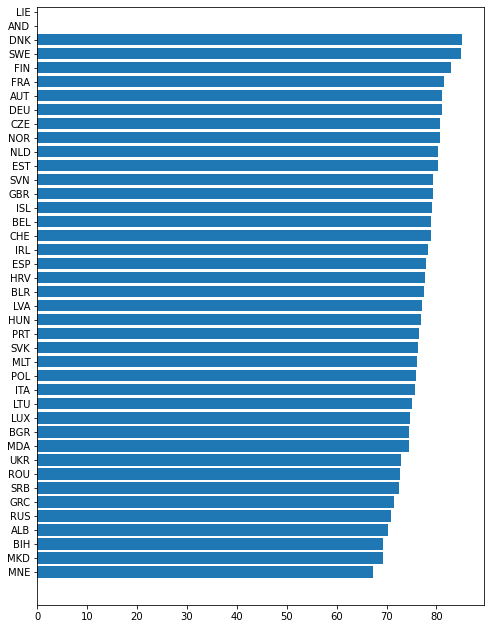

In [17]:
x = europe_scores['2019_global_index_score_(0-100)'].sort_values(ascending= True)
plt.figure(figsize=(8,11
                   ))
plt.barh(x.index, x.values)
# # europe_scores['2019_global_index_score_(0-100)'].plot(kind='barh')

In [20]:
x

id
DNK    85.217773
SWE    84.992351
FIN    82.822047
FRA    81.493399
AUT    81.073703
DEU    81.067213
CZE    80.736233
NOR    80.660824
NLD    80.378564
EST    80.220065
SVN    79.408120
GBR    79.375968
ISL    79.203001
BEL    78.891662
CHE    78.840287
IRL    78.215979
ESP    77.840505
HRV    77.791860
BLR    77.444762
LVA    77.134978
HUN    76.886594
PRT    76.425954
SVK    76.214701
MLT    76.105312
POL    75.928089
ITA    75.790128
LTU    75.103272
LUX    74.784461
BGR    74.519053
MDA    74.409774
UKR    72.813929
ROU    72.730755
SRB    72.486581
GRC    71.409637
RUS    70.940339
ALB    70.272647
BIH    69.388734
MKD    69.383922
MNE    67.250134
AND          NaN
LIE          NaN
MCO          NaN
SMR          NaN
Name: 2019_global_index_score_(0-100), dtype: float64

In [17]:
trend_columns = [i for i in clean_df.columns if 'trend' in i]
dashboard_columns = [i for i in clean_df.columns if (('dashboard' in i) and ('goal' in i))]

In [21]:
clean_df[['country'] + trend_columns]

,country,goal_1_trend,goal_2_trend,goal_3_trend,goal_4_trend,goal_5_trend,goal_6_trend,goal_7_trend,goal_8_trend,goal_9_trend,...,trend_sdg15_redlist,trend_sdg16_homicides,trend_sdg16_detain,trend_sdg16_safe,trend_sdg16_cpi,trend_sdg16_rsf,trend_sdg16_prison,trend_sdg17_govex,trend_sdg17_oda,trend_sdg17_govrev
0,Afghanistan,NaN,stagnant,stagnant,NaN,stagnant,increasing_moderately,NaN,stagnant,stagnant,...,decreasing,NaN,decreasing,decreasing,increasing_moderately,stagnant,NaN,decreasing,NaN,decreasing
1,Angola,decreasing,increasing_moderately,stagnant,NaN,stagnant,stagnant,increasing_moderately,NaN,stagnant,...,increasing_on_track,NaN,stagnant,NaN,increasing_moderately,increasing_moderately,NaN,NaN,NaN,decreasing
2,Albania,increasing_on_track,stagnant,increasing_moderately,increasing_on_track,increasing_moderately,increasing_on_track,increasing_on_track,stagnant,increasing_moderately,...,stagnant,increasing_on_track,stagnant,increasing_on_track,stagnant,stagnant,NaN,NaN,NaN,increasing_moderately
3,Andorra,NaN,NaN,NaN,NaN,NaN,increasing_on_track,NaN,NaN,NaN,...,increasing_on_track,increasing_on_track,increasing_on_track,NaN,NaN,increasing_on_track,NaN,increasing_on_track,NaN,NaN
4,United Arab Emirates,NaN,stagnant,increasing_moderately,NaN,stagnant,increasing_on_track,increasing_moderately,increasing_on_track,increasing_on_track,...,decreasing,increasing_on_track,NaN,NaN,increasing_on_track,decreasing,NaN,NaN,increasing_on_track,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,increasing_on_track,stagnant,increasing_moderately,increasing_moderately,stagnant,increasing_moderately,NaN,NaN,NaN,...,decreasing,NaN,NaN,NaN,NaN,increasing_on_track,NaN,NaN,NaN,increasing_moderately
189,"Yemen, Rep.",NaN,decreasing,stagnant,stagnant,stagnant,increasing_moderately,increasing_moderately,NaN,NaN,...,decreasing,NaN,NaN,decreasing,decreasing,increasing_moderately,NaN,NaN,NaN,NaN
190,South Africa,stagnant,increasing_moderately,increasing_moderately,NaN,increasing_moderately,increasing_moderately,increasing_moderately,stagnant,increasing_moderately,...,decreasing,decreasing,increasing_on_track,decreasing,decreasing,increasing_on_track,NaN,increasing_on_track,NaN,increasing_on_track
191,Zambia,stagnant,stagnant,increasing_moderately,NaN,increasing_moderately,stagnant,stagnant,increasing_moderately,increasing_moderately,...,stagnant,stagnant,NaN,decreasing,decreasing,decreasing,NaN,NaN,NaN,increasing_moderately


In [2]:
print(project_dir)
year =2019

/mnt/c/Users/aotubusen/Documents/DS Projects/sdg_mapping/sdg-mapping


In [3]:
with open(f'{project_dir}/data/aux/sdg_index_url_suffixes.json', 'r') as f:
        sdg_index_url_suffixes = json.load(f)
        print(sdg_index_url_suffixes)

{'2019': 'https://github.com/sdsna/2019GlobalIndex/raw/master/2019GlobalIndexResults.xlsx'}


In [4]:
for i,l in sdg_index_url_suffixes.items():
    print(l)

https://github.com/sdsna/2019GlobalIndex/raw/master/2019GlobalIndexResults.xlsx


In [5]:
url = 'https://github.com/sdsna/2019GlobalIndex/raw/master/2019GlobalIndexResults.xlsx'

In [7]:
# urllib.request.urlretrieve(url, f'{project_dir}/data/raw/{year}_sdg_index.xlsx')

In [107]:
def fetch_index(year): #, fout=None
    url = None
    if year == 2019:
        url = 'https://github.com/sdsna/2019GlobalIndex/raw/master/2019GlobalIndexResults.xlsx'

        fname = f'{year}_sdg_index.xlsx'
    return urllib.request.urlretrieve(url, f'{project_dir}/data/raw/{fname}')
def sdg_index_file_path(year):

    fname = f'{year}_sdg_index.xlsx'
    return f'{project_dir}/data/raw/{fname}' #/sdg_index
def read_workbook(data_sheet_name, data_path):
    # SDR2019 Data
    df = pd.read_excel(open(data_path, 'rb'),
              sheet_name=data_sheet_name)
    df.columns = df.iloc[0].values
    return df
def parse_2019_sdg_index(dataset):
    #{project_dir}
    with open(f'{project_dir}/data/aux/sdg_index_mappings.json', 'r') as f:
        maps = json.load(f)
    
    trend_map = maps['trend_map']
    achievement_map = maps['achievement_map']

    sdg_index_19_df = dataset.drop([0]).reset_index(drop=True)
    
    trend_columns = [i for i in sdg_index_19_df.columns if 'Trend' in i]
    dashboard_columns = [i for i in sdg_index_19_df.columns if (('Dashboard' in i) and ('Goal' in i))]


    for j in trend_columns:
        sdg_index_19_df[j] = sdg_index_19_df[j].map(trend_map)
    for j in dashboard_columns:
        sdg_index_19_df[j] = sdg_index_19_df[j].map(achievement_map)

#     sdg_index_19_df.to_csv('test.csv')

    return sdg_index_19_df#[trend_columns]

In [108]:
fetch_index(2019)

('/mnt/c/Users/aotubusen/Documents/DS Projects/sdg_research/sdg-mapping/data/raw/2019_sdg_index.xlsx',
 <http.client.HTTPMessage at 0x7fc26c13fef0>)

In [109]:
fin = sdg_index_file_path(year)

In [110]:
df = read_workbook('SDR2019 Data', fin)

In [111]:
parse_2019_sdg_index(df)

,Country,id,2019 Global Index Score (0-100),2019 Global Index Rank,Percentage missing values,Regional Score (0-100),Spillover Score (0-100),UN region name,Regions used for the SDG Index & Dashboard,Income Group in 2019,...,Goal 8 Regional Score,Goal 9 Regional Score,Goal 10 Regional Score,Goal 11 Regional Score,Goal 12 Regional Score,Goal 13 Regional Score,Goal 14 Regional Score,Goal 15 Regional Score,Goal 16 Regional Score,Goal 17 Regional Score
0,Afghanistan,AFG,49.6492,153,11.25,70.366,94.5116,Asia,E. Europe & C. Asia,LIC,...,70.8449,32.2131,68.0691,76.6235,78.949,87.2528,40.7251,66.2236,69.4011,69.8171
1,Angola,AGO,51.3204,149,2.38095,53.7825,98.5982,Africa,Africa,LMIC,...,63.2525,14.5609,46.6141,58.9167,92.0957,91.0864,54.5106,67.7353,54.2044,60.8872
2,Albania,ALB,70.2726,60,1.19048,70.366,89.6843,Europe,E. Europe & C. Asia,UMIC,...,70.8449,32.2131,68.0691,76.6235,78.949,87.2528,40.7251,66.2236,69.4011,69.8171
3,Andorra,AND,NaN,NaN,NaN,70.366,NaN,Europe,E. Europe & C. Asia,HIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,ARE,69.7089,65,9.52381,65.8835,47.4274,Asia,MENA,HIC,...,65.0102,37.6347,69.99,60.0227,73.234,78.2093,49.6869,57.8265,68.2358,73.9426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,WSM,NaN,NaN,NaN,60.5201,NaN,Oceania,Oceania,UMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,"Yemen, Rep.",YEM,53.7021,133,9.52381,65.8835,94.1096,Asia,MENA,LIC,...,65.0102,37.6347,69.99,60.0227,73.234,78.2093,49.6869,57.8265,68.2358,73.9426
190,South Africa,ZAF,61.4809,113,1.19048,53.7825,97.1035,Africa,Africa,UMIC,...,63.2525,14.5609,46.6141,58.9167,92.0957,91.0864,54.5106,67.7353,54.2044,60.8872
191,Zambia,ZMB,52.6151,139,0,53.7825,98.8037,Africa,Africa,LMIC,...,63.2525,14.5609,46.6141,58.9167,92.0957,91.0864,54.5106,67.7353,54.2044,60.8872


---

## Draft code

In [9]:
# sdg_index_19 = pd.read_excel(open('../../data/raw/2019GlobalIndexResults.xlsx', 'rb'),
#               sheet_name='SDR2019 Data')
d ='../../data/raw/2019_sdg_index.xlsx'
sdg_index_19 = pd.read_excel(open(d, 'rb'),
              sheet_name='SDR2019 Data', header = 1)
# sdg_index_19.columns = sdg_index_19.iloc[0].values


In [58]:
maps = {
  'trend_map' : {
    '.': np.nan,
    '↑': 'increasing_on_track',
    '➚': 'increasing_moderately',
    '→': 'stagnant',
    '↓': 'decreasing'
  },

  'achievement_map' : {
    'green': 'goal_achievement',
    'yellow': 'challenges_remain',
    'orange': 'significant_challenges',
    'red': 'major_challenges'
  }
}

In [65]:
with open(f'../../data/aux/sdg_index_mappings.json', 'w') as f:
    json.dump(maps,f)

In [66]:
with open(f'../../data/aux/sdg_index_mappings.json', 'r') as f:
#     parse_opts = f.read().decode("UTF-8")
    parse_opts = json.load(f)


In [114]:
parse_opts['trend_map']

In [68]:
trend_map = {
    '.': np.nan,
    '↑': 'increasing_on_track',
    '➚': 'increasing_moderately',
    '→': 'stagnant',
    '↓': 'decreasing'
}

achievement_map = {
    'green': 'goal_achievement',
    'yellow': 'challenges_remain',
    'orange': 'significant_challenges',
    'red': 'major_challenges'
}


In [49]:
sdg_index_19_df = sdg_index_19.drop([0]).reset_index(drop=True)

In [113]:
sdg_index_19_df.head()

In [51]:
trend_columns = [i for i in sdg_index_19_df.columns if 'Trend' in i]
dashboard_columns = [i for i in sdg_index_19_df.columns if (('Dashboard' in i) and ('Goal' in i))]

In [52]:
for j in trend_columns:
    sdg_index_19_df[j] = sdg_index_19_df[j].map(trend_map)

In [53]:
for j in dashboard_columns:
    sdg_index_19_df[j] = sdg_index_19_df[j].map(achievement_map)

In [112]:
sdg_index_19_df[dashboard_columns]#.map(trend_map)